## Import Modules

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [65]:
%pip install numpy pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


## Load the Dataset

In [66]:
import pandas as pd

url = "https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv"
df = pd.read_csv(url)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [67]:
## get categorical coloumns
cat_cols = [col for col in df.columns if df[col].dtype=='object']
cat_cols

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [68]:
# dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [69]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [70]:
df = df.drop(['customerID'], axis=1)



In [ ]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())


In [71]:
#change Total Cahrges to numeruc datatype
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [72]:
#display null values rows
df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [73]:
#drop rows where tenure is 0
df =df.drop(labels=df[df['tenure']==0].index, axis=0)
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Expploratory Data Analysis

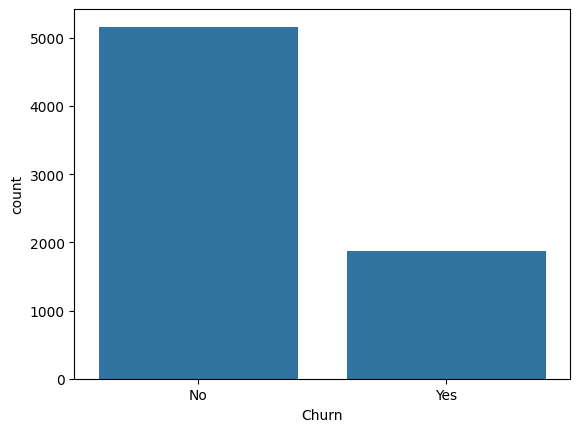

In [74]:
sns.countplot(x='Churn', data=df);

data set is likely imbalnced , suggest to use sampling techniques to balance the dataset

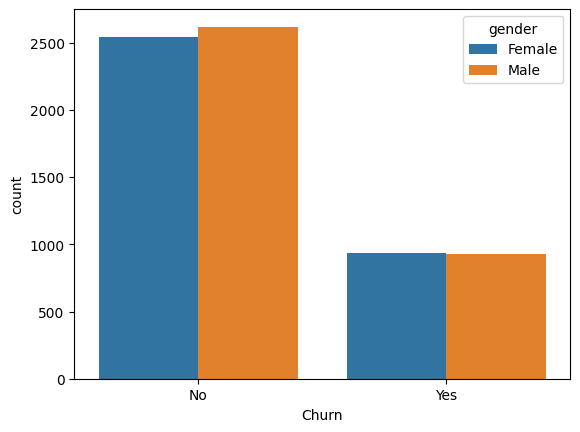

In [75]:
sns.countplot(x='Churn', hue='gender' , data=df);

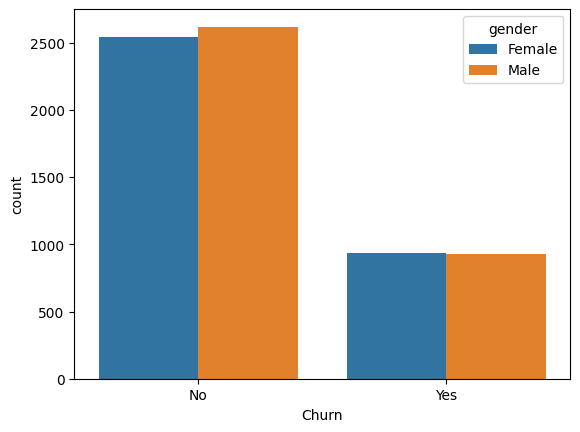

In [76]:
sns.countplot(x='Churn', hue='gender' , data=df);

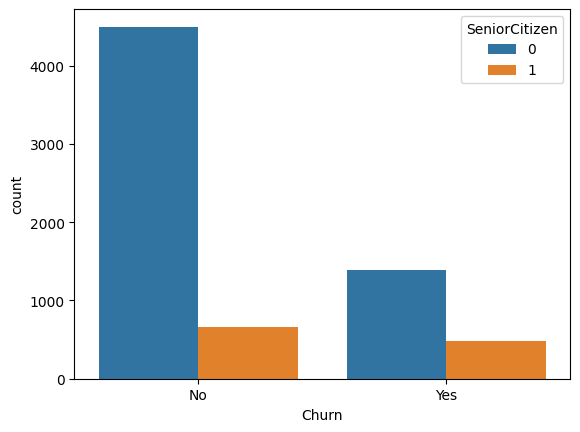

In [77]:
sns.countplot(x='Churn', hue='SeniorCitizen' , data=df);

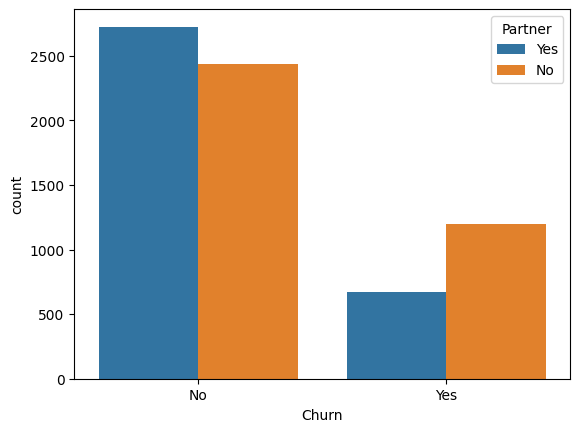

In [78]:
sns.countplot(x='Churn', hue='Partner' , data=df);

### People who don't have a partner or a single person are more likely to get turned. 

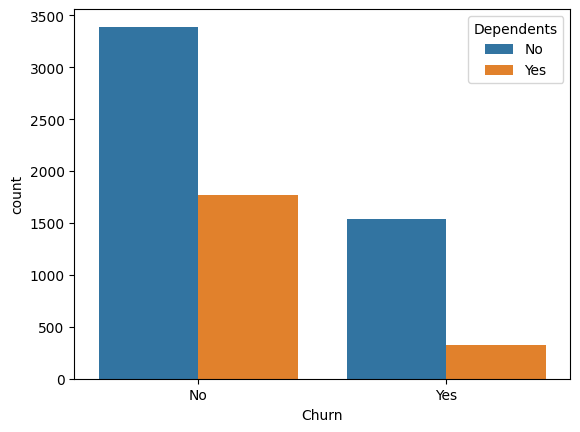

In [79]:
sns.countplot(x='Churn', hue='Dependents' , data=df);

### People who don't have dependence on others or single persons are more likely to change. 
### Person has a family, then all of them prefer to use same service, so it is less likely to churn

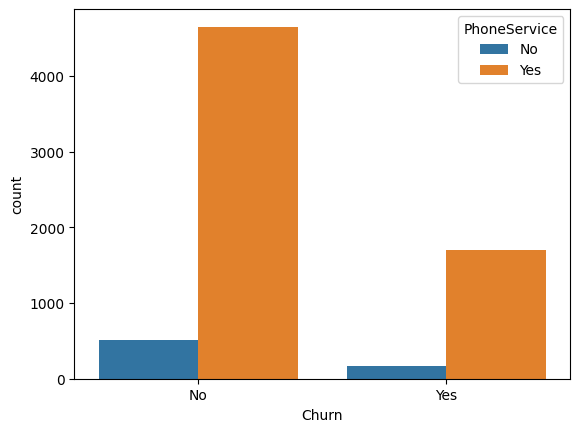

In [80]:
sns.countplot(x='Churn', hue='PhoneService' , data=df);

### Those who have PhoneService are more likely to join. 

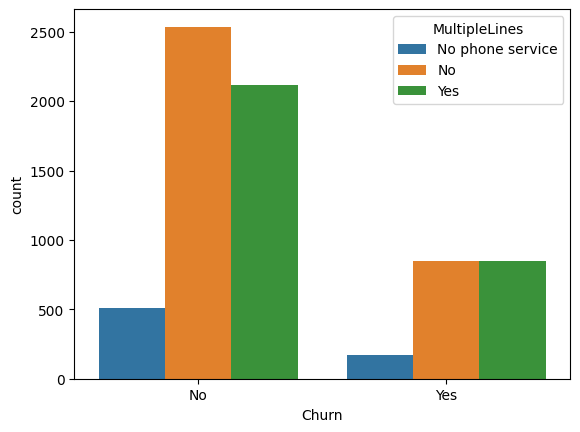

In [81]:
sns.countplot(x='Churn', hue='MultipleLines' , data=df);

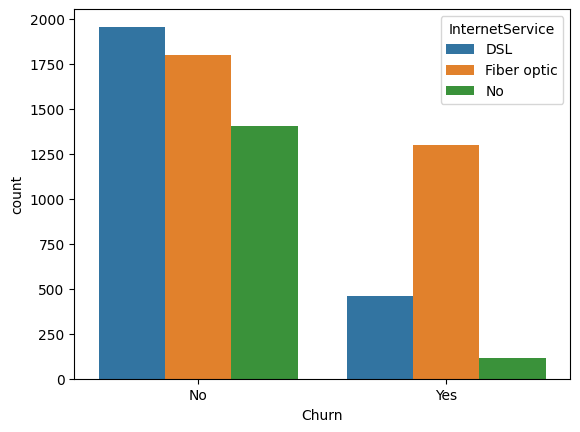

In [82]:
sns.countplot(x='Churn', hue='InternetService' , data=df);

### People who have fiber optic are more likely to churn. 
### People who have DSL are more likely to get retained. 

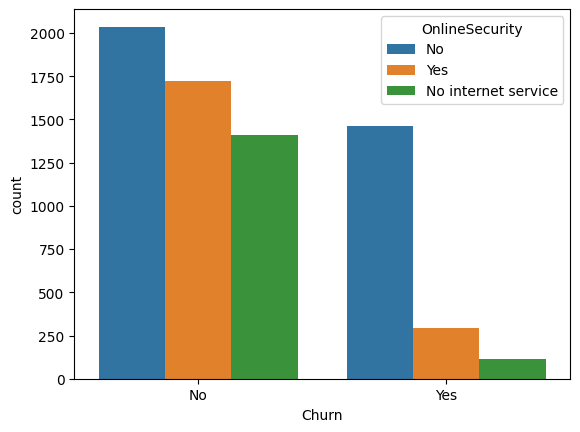

In [83]:
sns.countplot(x='Churn', hue='OnlineSecurity' , data=df);

### People who do not have online security are more likely to churn. 

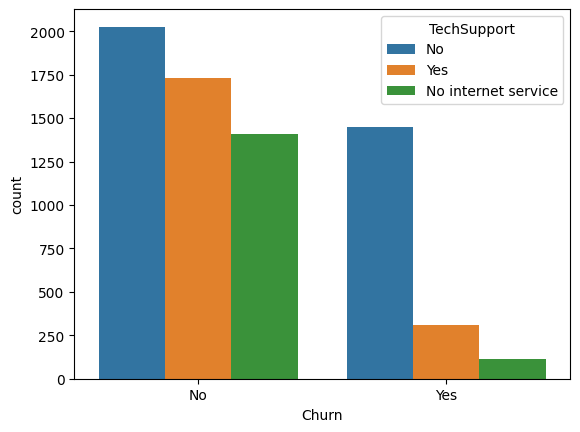

In [84]:
sns.countplot(x='Churn', hue='TechSupport' , data=df);

### People who do not have tech support are more likely to 

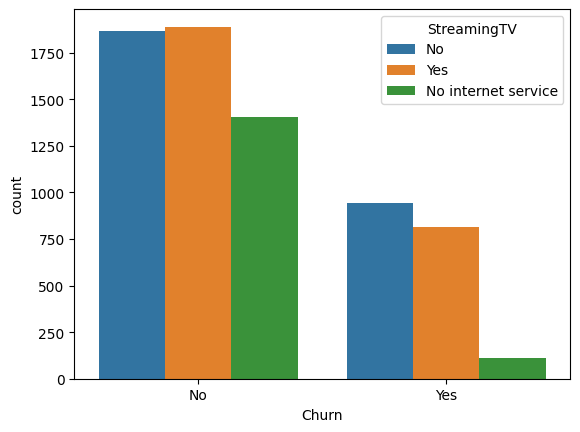

In [85]:
sns.countplot(x='Churn', hue='StreamingTV' , data=df);

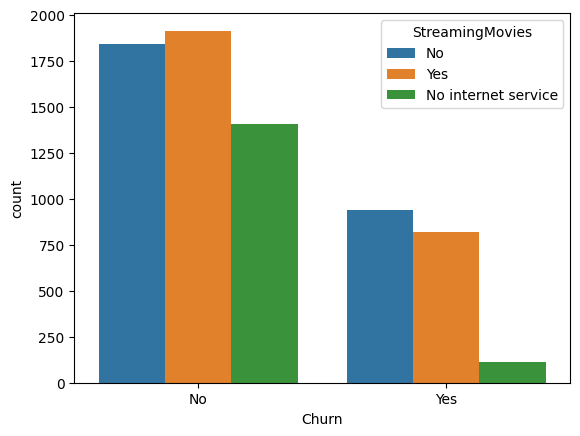

In [86]:
sns.countplot(x='Churn', hue='StreamingMovies' , data=df);

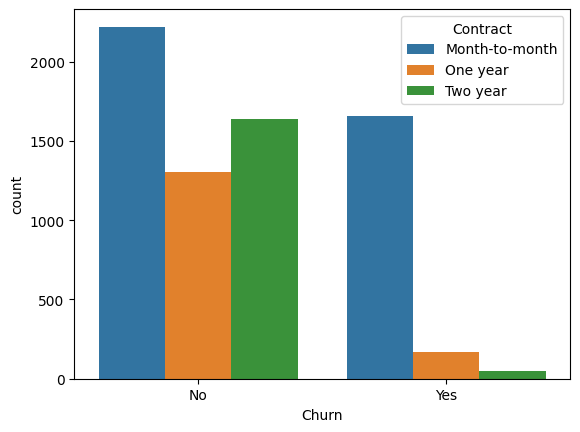

In [87]:
sns.countplot(x='Churn', hue='Contract' , data=df);

### People who have month-to-month contracts are more likely to join, while people with 1-year or 2-year contracts are less likely to join. 

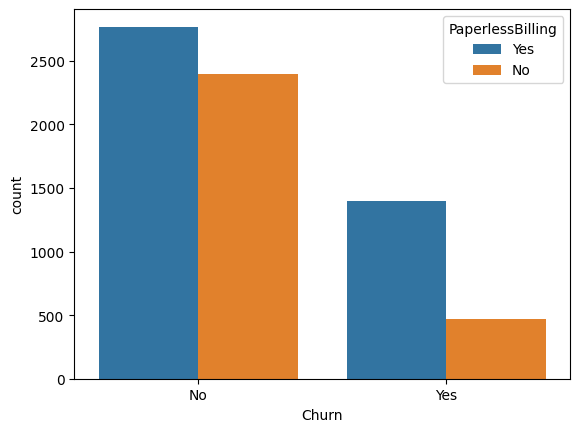

In [88]:
sns.countplot(x='Churn', hue='PaperlessBilling' , data=df);

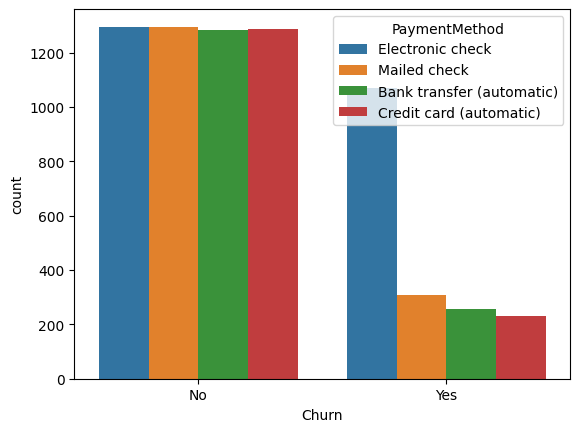

In [89]:
sns.countplot(x='Churn', hue='PaymentMethod' , data=df);

### People who use electronic checks are more likely to churn. 

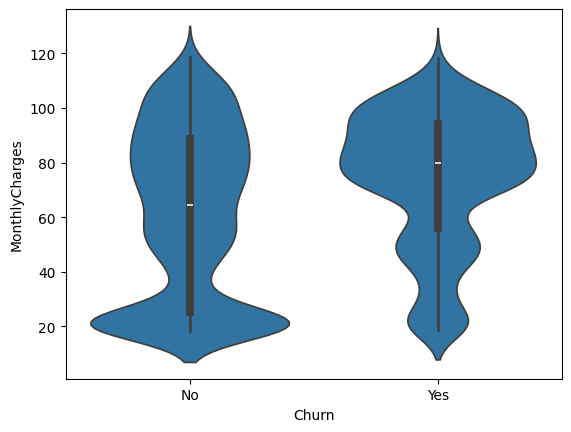

In [90]:
sns.violinplot(x='Churn', y='MonthlyCharges' , data=df);

### Higher monthly charges can lead to higher churn

In [91]:
df['TotalCharges'].unique()[:10]


array([  29.85, 1889.5 ,  108.15, 1840.75,  151.65,  820.5 , 1949.4 ,
        301.9 , 3046.05, 3487.95])

<Axes: xlabel='Churn', ylabel='TotalCharges'>

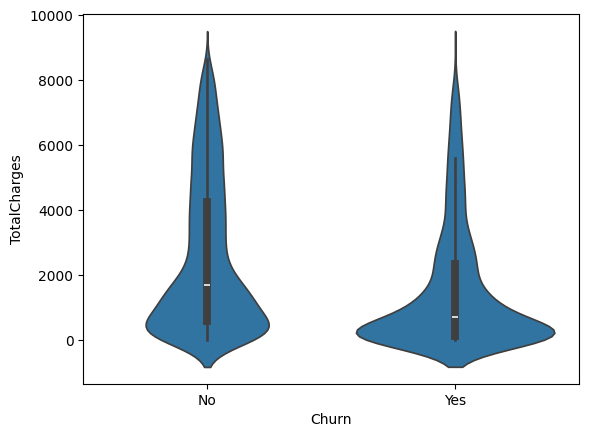

In [92]:
# Convert to numeric, turning invalid entries into NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows where TotalCharges is NaN
df = df.dropna(subset=['TotalCharges'])

# Now you can plot
sns.violinplot(x='Churn', y='TotalCharges', data=df)


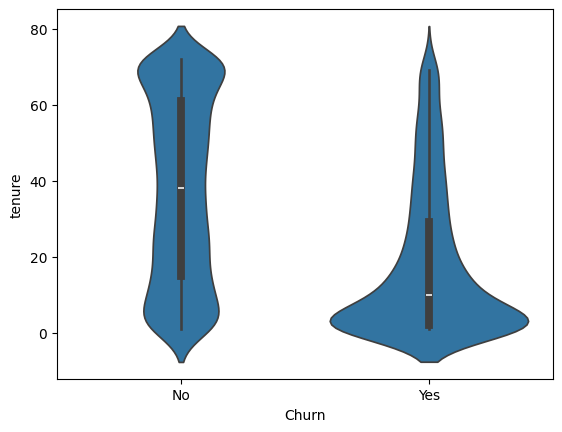

In [93]:
sns.violinplot(x='Churn', y='tenure' , data=df);

### People who have lesser tenure are more likely to join. People who have subscribed for a lesser number of months are more likely to join. 

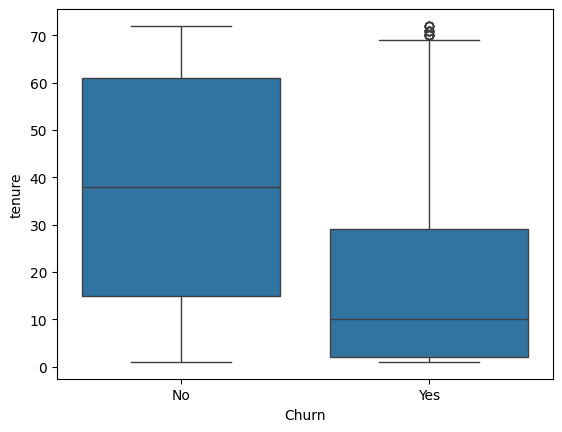

In [94]:
sns.boxplot(x='Churn', y='tenure' , data=df);

<Axes: xlabel='TotalCharges', ylabel='Density'>

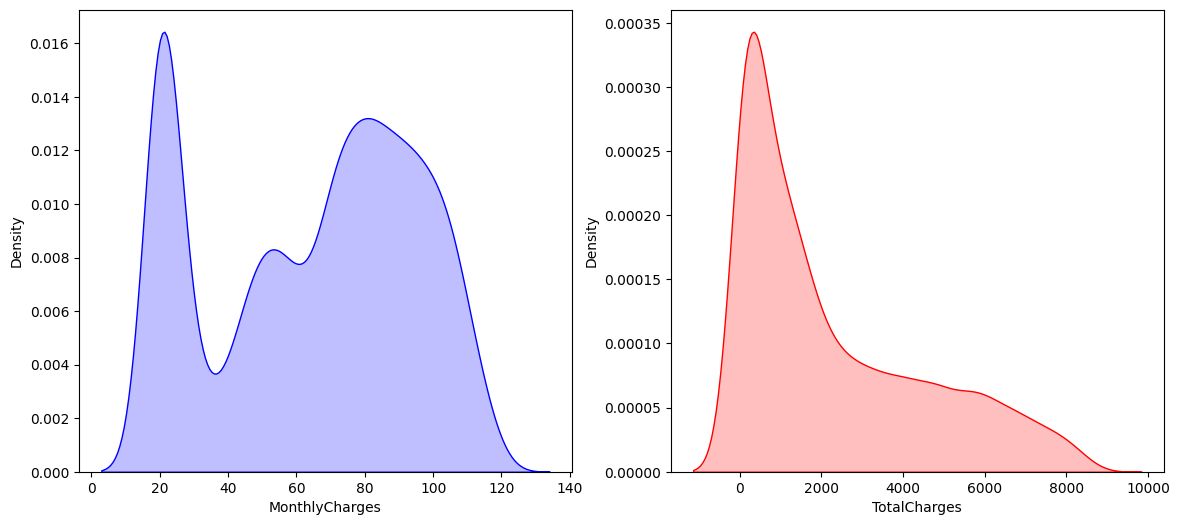

In [95]:
fig, axes=plt.subplots(1,2, figsize=(14, 6))
sns.kdeplot(df['MonthlyCharges'], ax=axes[0], color='blue', shade=True)
sns.kdeplot(df['TotalCharges'], ax=axes[1], color='red', shade=True)


## Correlation Matrix 

<Axes: >

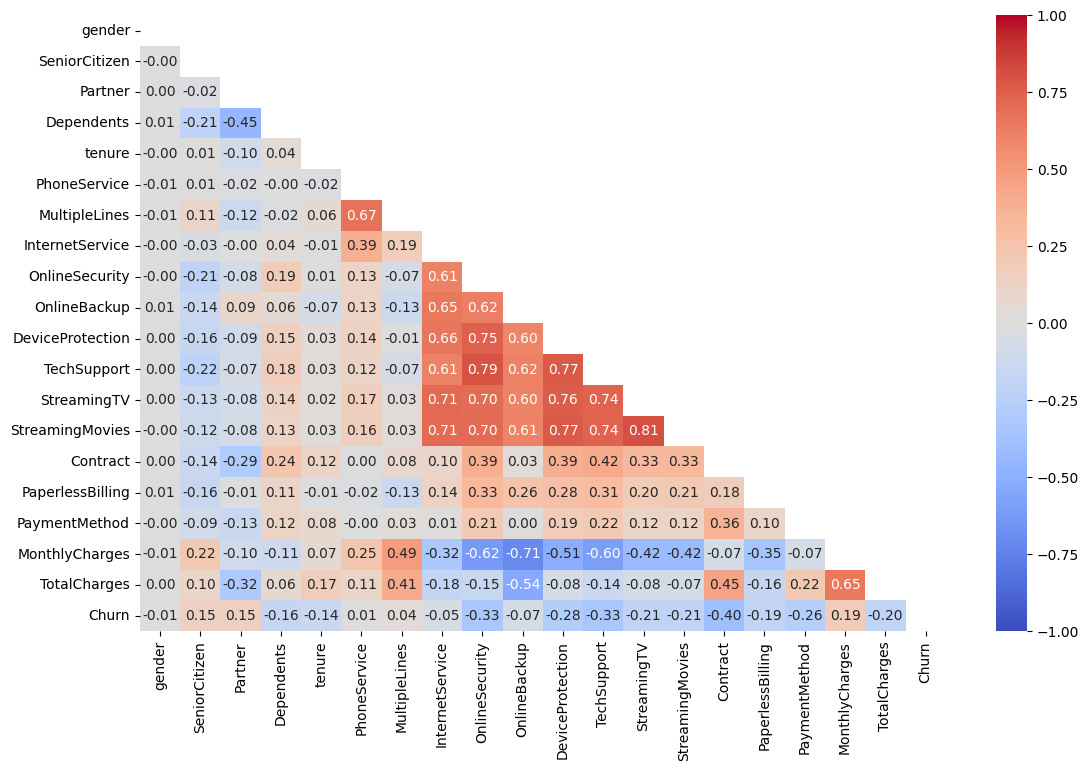

In [96]:
plt.figure(figsize=(13, 8))
corr = df.apply(lambda x: pd.factorize(x)[0] if x.dtype!='float64' else x).corr() 
mask = np.triu(np.ones_like(corr,dtype=bool))
sns.heatmap(corr,mask=mask, cmap='coolwarm' , vmax=1 , vmin=-1 , center=0, annot=True ,fmt='.2f')

In [97]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [98]:
cat_cols = [col for col in df.columns if df[col].dtype=='object']
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [99]:
from sklearn.preprocessing import LabelEncoder 
for col in cat_cols :
    le = LabelEncoder() 
    df[col] = le.fit_transform(df[col]) 
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0


In [100]:
# Perform log transformation. 
df['MonthlyCharges']= np.log(df['MonthlyCharges']+1)
df['TotalCharges']= np.log(df['TotalCharges']+1)

<Axes: xlabel='TotalCharges', ylabel='Density'>

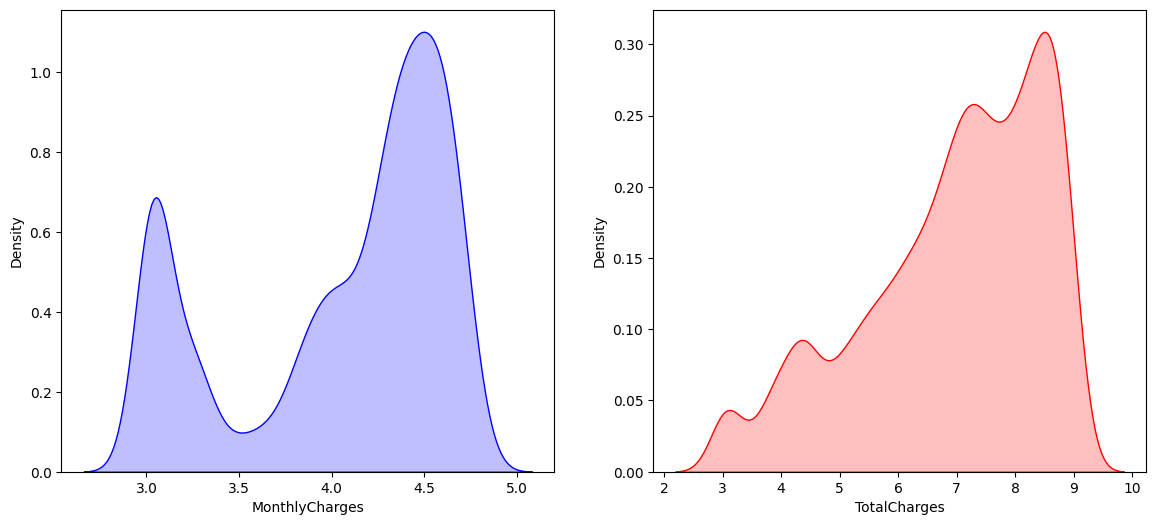

In [101]:
fig, axes= plt.subplots(1,2, figsize=(14, 6))
sns.kdeplot(df['MonthlyCharges'], ax=axes[0], color='blue', shade=True)
sns.kdeplot(df['TotalCharges'], ax=axes[1], color='red', shade=True)


## Train Test Split

In [102]:
X = df.drop(columns=['Churn'])
y = df['Churn']

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [104]:
print("y_train dtype:", y_train.dtype)
print("y_train unique values:", y_train.unique())
print("y_train value counts:\n", y_train.value_counts())


y_train dtype: int64
y_train unique values: [0 1]
y_train value counts:
 Churn
0    4130
1    1495
Name: count, dtype: int64


In [105]:
# Simple upsampling using pandas (if SMOTE unavailable)
churned = df[df['Churn'] == 1]
not_churned = df[df['Churn'] == 0].sample(n=len(churned), replace=True)
df_balanced = pd.concat([churned, not_churned])


In [106]:
# ✅ Ensure TotalCharges is numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

# === Split the data ===
X = df.drop('Churn', axis=1)
y = df['Churn'].replace({'Yes': 1, 'No': 0})

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import joblib

# === Define numeric and categorical columns ===
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
cat_features = [col for col in X.columns if col not in num_features]

# === Preprocessor ===
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
])

# === Define model ===
clf = LogisticRegression(class_weight='balanced', max_iter=1000, solver='liblinear')

# === Create pipeline ===
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', clf)
])

# === Split data ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === Fit the pipeline ===
pipeline.fit(X_train, y_train)

# === Evaluate ===
print("Training accuracy:", pipeline.score(X_train, y_train))
print("Test accuracy:", pipeline.score(X_test, y_test))

# === Save the pipeline ===
joblib.dump(pipeline, "churn_pipeline.joblib")
print("✅ Model saved as churn_pipeline.joblib")


Training accuracy: 0.7568
Test accuracy: 0.7348969438521677
✅ Model saved as churn_pipeline.joblib


## Model Training 

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
import joblib

# Define categorical and numerical features
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
cat_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
            'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
            'Contract', 'PaperlessBilling', 'PaymentMethod']

# Preprocessing
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

# Balanced Logistic Regression
log_reg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

# Final pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf', log_reg)
])

# Fit
pipeline.fit(X_train, y_train)

# Evaluate
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Save
joblib.dump(pipeline, "churn_pipeline.joblib")
print("✅ Saved as churn_pipeline.joblib")


In [107]:
# ------------------------------
# LOGISTIC REGRESSION MODEL
# ------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline
import joblib

# Initialize and train (balanced to handle class imbalance)
log_reg = LogisticRegression(class_weight='balanced', max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict
y_pred_log = log_reg.predict(X_test)

# Evaluate
print("🔹 Logistic Regression Report:")
print(classification_report(y_test, y_pred_log))
print("Accuracy:", accuracy_score(y_test, y_pred_log))

# Create pipeline
log_reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf', log_reg)
])

# Fit on full data
log_reg_pipeline.fit(X_train, y_train)

# Save model
joblib.dump(log_reg_pipeline, "logreg_churn_pipeline.joblib")
print("💾 Saved as logreg_churn_pipeline.joblib")


🔹 Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1033
           1       0.49      0.79      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.79      0.73      0.74      1407

Accuracy: 0.7277896233120114
💾 Saved as logreg_churn_pipeline.joblib


In [108]:
# ------------------------------
# RANDOM FOREST MODEL
# ------------------------------
from sklearn.ensemble import RandomForestClassifier

# Initialize and train
rf_model = RandomForestClassifier(
    class_weight='balanced',
    n_estimators=200,
    random_state=42
)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
print("\n🔹 Random Forest Report:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

# Create pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf', rf_model)
])

# Fit on full data
rf_pipeline.fit(X_train, y_train)

# Save model
joblib.dump(rf_pipeline, "rf_churn_pipeline.joblib")
print("💾 Saved as rf_churn_pipeline.joblib")



🔹 Random Forest Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1033
           1       0.63      0.46      0.53       374

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.69      1407
weighted avg       0.77      0.78      0.77      1407

Accuracy: 0.783226723525231
💾 Saved as rf_churn_pipeline.joblib


In [109]:
# ✅ STEP: Create full preprocessing + model pipeline

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
import joblib

# Define categorical and numerical columns (as in your dataset)
cat_cols = ['gender','Partner','Dependents','PhoneService','MultipleLines',
            'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
            'TechSupport','StreamingTV','StreamingMovies','Contract',
            'PaperlessBilling','PaymentMethod']

num_cols = ['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']

# Preprocessor for encoding
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
    ('num', 'passthrough', num_cols)
])

# Combine preprocessor + model into one pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Fit on training data
pipeline.fit(X_train, y_train)

# Save the complete pipeline
joblib.dump(pipeline, "churn_pipeline.joblib")

print("✅ Pipeline trained and saved successfully!")


✅ Pipeline trained and saved successfully!


In [110]:
from sklearn.model_selection import GridSearchCV
params = {'n_estimators': [100, 200], 'max_depth': [4, 8, 16]}
grid = GridSearchCV(RandomForestClassifier(), param_grid=params)
grid.fit(X_train, y_train)


,estimator,RandomForestClassifier()
,param_grid,"{'max_depth': [4, 8, ...], 'n_estimators': [100, 200]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [111]:
if 'Churn' in cat_cols:
	cat_cols.remove('Churn')
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [112]:
# ------------------------------
# CATBOOST MODEL
# ------------------------------
from catboost import CatBoostClassifier

# Initialize and train
cat_model = CatBoostClassifier(verbose=False, random_state=42)
cat_model.fit(X_train, y_train, cat_features=cat_cols)

# Predict
y_pred_cat = cat_model.predict(X_test)

# Evaluate
print("\n🔹 CatBoost Report:")
print(classification_report(y_test, y_pred_cat))
print("Accuracy:", accuracy_score(y_test, y_pred_cat))

# Create pipeline
cat_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf', cat_model)
])

# Fit on full data
cat_pipeline.fit(X_train, y_train)

# Save model
joblib.dump(cat_pipeline, "cat_churn_pipeline.joblib")
print("💾 Saved as cat_churn_pipeline.joblib")



🔹 CatBoost Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.50      0.56       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

Accuracy: 0.7924662402274343
💾 Saved as cat_churn_pipeline.joblib


In [113]:
# ------------------------------
# COMPARE MODELS AND PICK BEST
# ------------------------------
from sklearn.metrics import accuracy_score

# Get accuracies
acc_log = accuracy_score(y_test, y_pred_log)
acc_rf = accuracy_score(y_test, y_pred_rf)
acc_cat = accuracy_score(y_test, y_pred_cat)

print("\n📊 Accuracy Comparison:")
print(f"Logistic Regression: {acc_log:.4f}")
print(f"Random Forest:       {acc_rf:.4f}")
print(f"CatBoost:            {acc_cat:.4f}")

# Select best model
if acc_cat >= acc_rf and acc_cat >= acc_log:
    best_model_name = "CatBoost"
    best_pipeline = cat_pipeline
elif acc_rf >= acc_log:
    best_model_name = "RandomForest"
    best_pipeline = rf_pipeline
else:
    best_model_name = "LogisticRegression"
    best_pipeline = log_reg_pipeline

print(f"\n✅ Best Model Selected: {best_model_name}")

# Save as final pipeline
joblib.dump(best_pipeline, "churn_pipeline.joblib")
print("💾 Final model saved as churn_pipeline.joblib")



📊 Accuracy Comparison:
Logistic Regression: 0.7278
Random Forest:       0.7832
CatBoost:            0.7925

✅ Best Model Selected: CatBoost
💾 Final model saved as churn_pipeline.joblib


In [114]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Assuming you already have:
# y_test, y_pred (predicted labels), and maybe y_proba (predicted probabilities)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
if 'predict_proba' in dir(model):
    y_proba = model.predict_proba(X_test)[:, 1]
    print("ROC-AUC:", roc_auc_score(y_test, y_proba))


Accuracy: 0.7860696517412935
Precision: 0.6298932384341637
Recall: 0.4732620320855615
F1: 0.5404580152671755
ROC-AUC: 0.8256518835643032


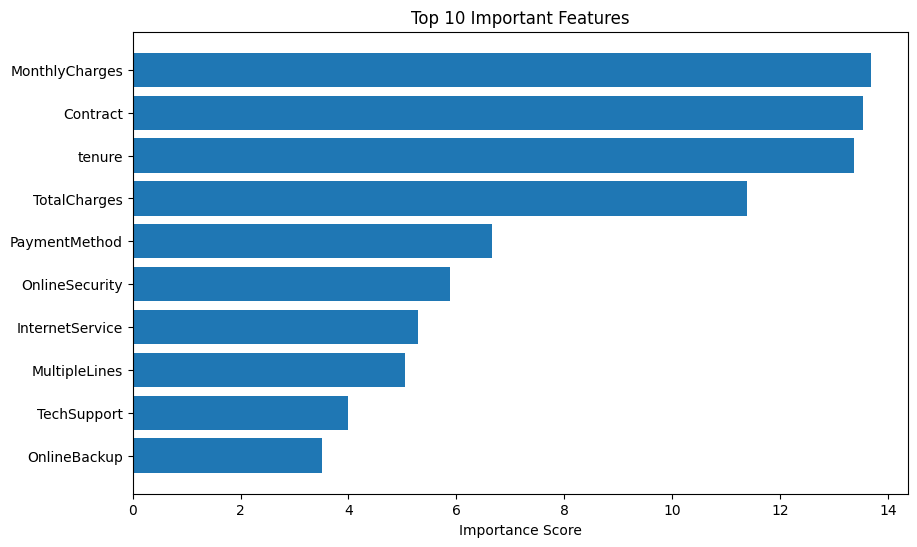

In [115]:
import pandas as pd
import numpy as np

# If you used a tree-based model like RandomForest or XGBoost
if hasattr(model, "feature_importances_"):
    importance = pd.DataFrame({
        "Feature": X_train.columns,
        "Importance": model.feature_importances_
    }).sort_values("Importance", ascending=False)

    plt.figure(figsize=(10,6))
    plt.barh(importance["Feature"][:10], importance["Importance"][:10])
    plt.gca().invert_yaxis()
    plt.title("Top 10 Important Features")
    plt.xlabel("Importance Score")
    plt.show()
else:
    print("This model type doesn't support feature_importances_ directly.")


In [116]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## Confusion Matrix

<Axes: >

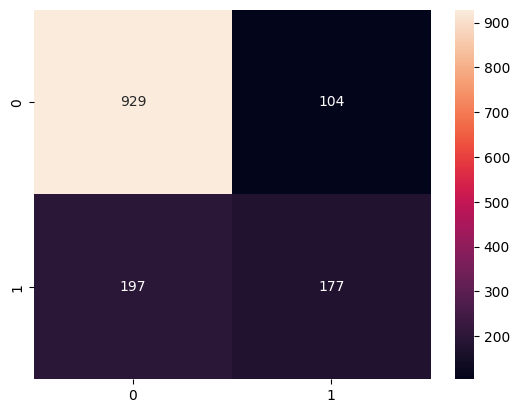

In [117]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test , y_pred), annot=True, fmt='d')

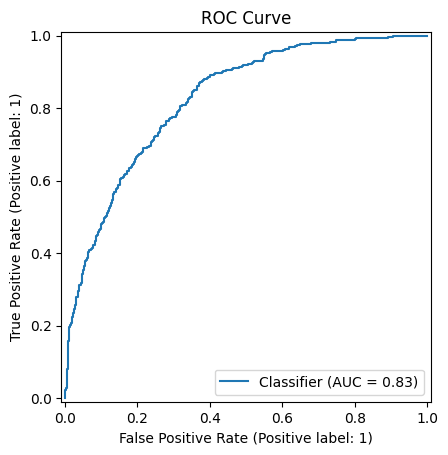

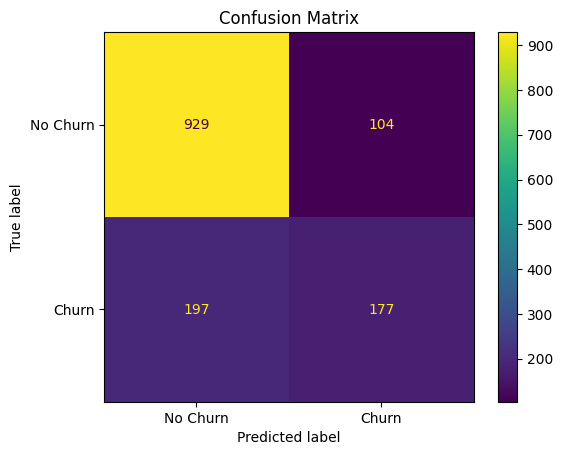

In [118]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay

# ROC Curve
if 'y_proba' in locals():
    RocCurveDisplay.from_predictions(y_test, y_proba)
    plt.title("ROC Curve")
    plt.show()

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['No Churn', 'Churn'])
plt.title("Confusion Matrix")
plt.show()


In [119]:
# === FINAL STEP IN NOTEBOOK ===
%pip install scikit-learn joblib

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
import joblib

# Identify your feature columns
feature_cols = X.columns.tolist()
print("Feature columns used:", feature_cols)

# Separate numeric and categorical columns
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']  # change as needed
cat_cols = [c for c in feature_cols if c not in num_cols]

# Build preprocessing and model pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', LogisticRegression())  # can also use RandomForestClassifier()
])

# Fit and save pipeline
pipeline.fit(X_train, y_train)
joblib.dump(pipeline, 'churn_pipeline.joblib')
print("✅ Saved churn_pipeline.joblib successfully!")


Note: you may need to restart the kernel to use updated packages.
Feature columns used: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']
✅ Saved churn_pipeline.joblib successfully!



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [120]:
import joblib
pipeline = joblib.load("churn_pipeline.joblib")
print("PIPELINE:", pipeline)
print("Pipeline steps:", pipeline.named_steps.keys())

clf = pipeline.named_steps.get('clf', pipeline.named_steps.get('classifier', None))
print("Classifier object:", clf)
print("Has classes_?:", hasattr(clf, "classes_"))
print("classes_:", getattr(clf, "classes_", None))
print("Has coef_?:", hasattr(clf, "coef_"))
print("coef_ shape or value:", getattr(clf, "coef_", None))
print("intercept_:", getattr(clf, "intercept_", None))


PIPELINE: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                     

In [121]:
import pandas as pd
import joblib

# Load the pipeline
pipeline = joblib.load("churn_pipeline.joblib")

# Create a small test sample (values similar to real data)
test_sample = pd.DataFrame([{
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 24,
    'PhoneService': 'Yes',
    'MultipleLines': 'No',
    'InternetService': 'DSL',
    'OnlineSecurity': 'Yes',
    'OnlineBackup': 'No',
    'DeviceProtection': 'Yes',
    'TechSupport': 'No',
    'StreamingTV': 'Yes',
    'StreamingMovies': 'No',
    'Contract': 'One year',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 70.35,
    'TotalCharges': 1650.5
}])

# Predict
prediction = pipeline.predict(test_sample)[0]
proba = pipeline.predict_proba(test_sample)[0, 1]

print("Prediction (1 = Churn, 0 = Not Churn):", prediction)
print("Churn Probability:", proba)


Prediction (1 = Churn, 0 = Not Churn): 0
Churn Probability: 0.0


In [122]:
import numpy as np
# few rows
print("X_test.head():")
display(X_test.head())

# raw predictions & probs on a few test rows
print("pred (first 5):", pipeline.predict(X_test.iloc[:5]))
print("proba (first 5):", pipeline.predict_proba(X_test.iloc[:5]))

# distribution on test set
probas_test = pipeline.predict_proba(X_test)[:,1]
print("proba_test stats -> min, max, mean:", np.min(probas_test), np.max(probas_test), np.mean(probas_test))
print("How many >0.5:", (probas_test>0.5).sum(), "of", len(probas_test))


X_test.head():


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2481,1,1,1,0,61,1,2,2,1,1,1,1,1,1,2,0,0,3.258097,7.315052
6784,0,0,0,0,19,1,2,2,1,1,1,1,1,1,0,0,0,3.246491,6.146008
6125,1,0,1,0,13,1,2,1,0,0,2,0,2,2,0,1,1,4.637153,7.215240
3052,1,0,1,0,37,1,2,0,2,0,0,0,0,0,0,1,3,4.026244,7.616653
4099,0,0,0,0,6,0,1,0,2,0,0,0,0,0,0,0,0,3.416086,5.090370


pred (first 5): [0 0 1 0 0]
proba (first 5): [[0.98773551 0.01226449]
 [0.90707247 0.09292753]
 [0.32674301 0.67325699]
 [0.88579258 0.11420742]
 [0.68296709 0.31703291]]
proba_test stats -> min, max, mean: 0.003980984298429847 0.9414848163238175 0.2689178195353571
How many >0.5: 290 of 1407


In [123]:
pipeline.feature_names_in_


array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges'], dtype=object)

In [124]:
import joblib
joblib.dump(rf_model, 'churn_model.pkl')
# Or prediction interface using Streamlit


['churn_model.pkl']

In [125]:
import joblib
pipeline = joblib.load("churn_pipeline.joblib")
print(pipeline)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                               

In [126]:
y_train.value_counts(normalize=True)


Churn
0    0.734222
1    0.265778
Name: proportion, dtype: float64

In [128]:
import pandas as pd, numpy as np, joblib

pipeline = joblib.load("cat_churn_pipeline.joblib")

sample = pd.DataFrame([{
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 24,
    'PhoneService': 'Yes',
    'MultipleLines': 'No',
    'InternetService': 'DSL',
    'OnlineSecurity': 'Yes',
    'OnlineBackup': 'No',
    'DeviceProtection': 'Yes',
    'TechSupport': 'No',
    'StreamingTV': 'Yes',
    'StreamingMovies': 'No',
    'Contract': 'One year',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 70.35,
    'TotalCharges': 1650.5
}])

pred = pipeline.predict(sample)[0]
proba = pipeline.predict_proba(sample)[0]

print("✅ Prediction:", pred)
print("✅ Probability:", proba)


✅ Prediction: 0
✅ Probability: [0.88357145 0.11642855]
